In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import operator

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# random seed for reproducibility
np.random.seed(42)

In [7]:
# data 
X_linear = np.linspace(0, 10, 100)
Y_linear_true = 2 * X_linear + 3
Y_linear = Y_linear_true + np.random.normal(0, 1, X_linear.shape)
X_linear = X_linear.reshape(-1, 1)
Y_linear = Y_linear.reshape(-1, 1)

X_quadratic = np.linspace(0, 10, 100)
Y_quadratic_true = 0.5 * X_quadratic**2 + 2 * X_quadratic + 1
Y_quadratic = Y_quadratic_true + np.random.normal(0, 1, X_quadratic.shape)
X_quadratic = X_quadratic.reshape(-1, 1)
Y_quadratic = Y_quadratic.reshape(-1, 1)

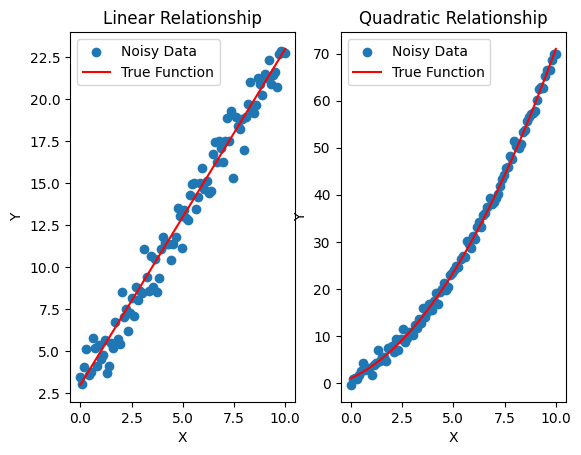

In [8]:
# Linear 
plt.subplot(1, 2, 1)
plt.scatter(X_linear, Y_linear, label='Noisy Data')
plt.plot(X_linear, Y_linear_true, color='red', label='True Function')
plt.title('Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Quadratic 
plt.subplot(1, 2, 2)
plt.scatter(X_quadratic, Y_quadratic, label='Noisy Data')
plt.plot(X_quadratic, Y_quadratic_true, color='red', label='True Function')
plt.title('Quadratic Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

### 1.Purpose of adding Gaussian noise:
Adding Gaussian noise to the output variable ( Y ) simulates real-world data, which often contains some level of randomness or measurement error. This helps in evaluating the robustness and performance of regression models under realistic conditions.
### 2.Importance of visualizing the data and the true functions:
Visualizing the data and the true functions allows you to understand the underlying relationship between the variables and assess how well the model fits the data. Also, this visualization is crucial for diagnosing issues related to model
bias and variance, and for making informed decisions about model selection and tuning.

## Task 2

In [9]:
degrees = [1, 3, 5, 7, 9, 12]

def train_LinearRegression(degrees, X, Y):
    #train models
    models = []
    poly_features = []
    for degree in degrees:
        poly = PolynomialFeatures(degree)
        poly_features.append(poly)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, Y)
        models.append(model)
    return models, poly_features

# for use in plotting colors
def generate_random_color():
    return random.random(), random.random(), random.random()



In [10]:
def plot2(models, poly_features, degrees, X, Y, X_test):
    # Plot  data and  models
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 12))

    i = 0
    for degree, model, poly, ax in zip(degrees, models, poly_features, axes.flat):
        X_test_poly = poly.fit_transform(X_test)
        Y_test_poly = model.predict(X_test_poly)

        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X_test, Y_test_poly), key=sort_axis)
        x, y_poly = zip(*sorted_zip)
        ax.plot(x, y_poly,color = generate_random_color() , label=f'lin_regression degree {degree}')
        ax.scatter(X, Y, label='Noisy Data')
        ax.set_title(f'Degree {degree}')
        i = i + 1
    fig.suptitle('Polynomial Regression with Varying Degrees')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


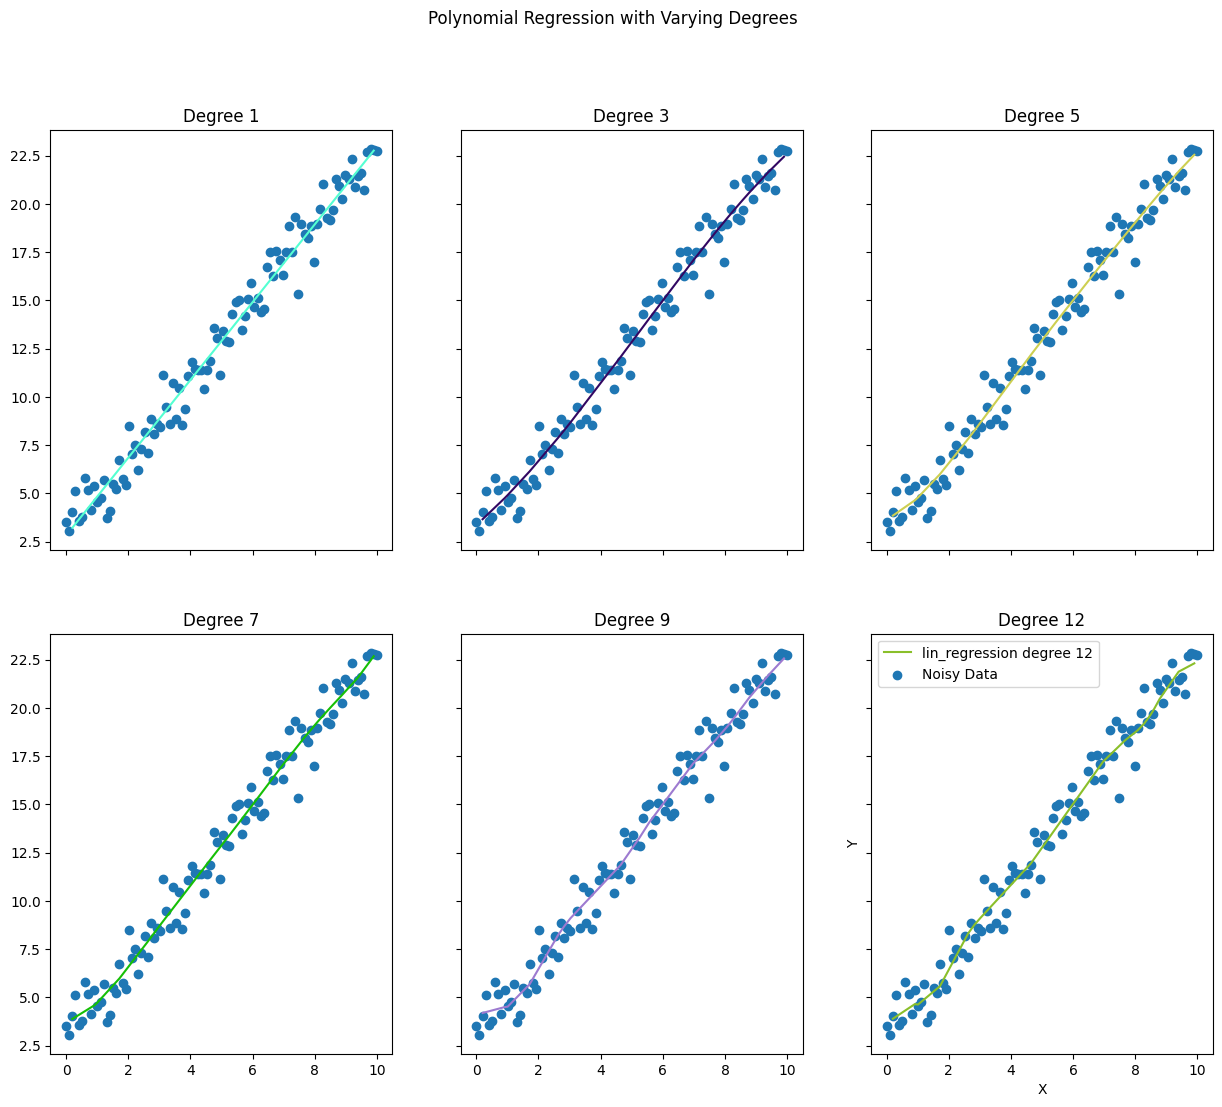

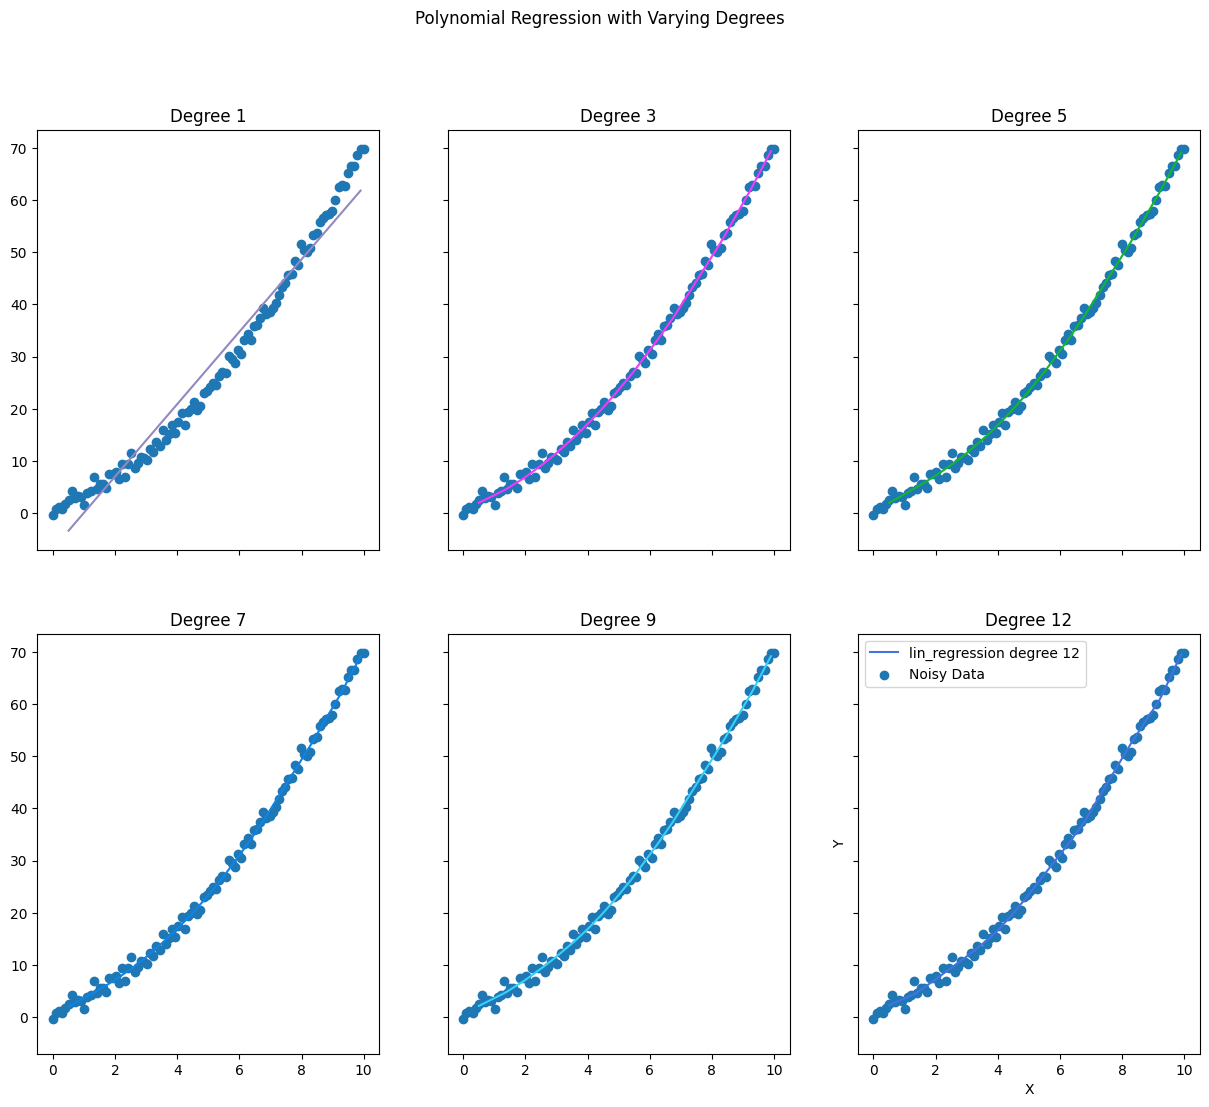

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_linear, Y_linear, test_size=0.2)
models, poly_features = train_LinearRegression(degrees, X_train, Y_train)

plot2(models, poly_features, degrees, X_linear, Y_linear, X_test)

X_train, X_test, Y_train, Y_test = train_test_split(X_quadratic, Y_quadratic, test_size=0.2)
models, poly_features = train_LinearRegression(degrees, X_train, Y_train)

plot2(models, poly_features, degrees, X_quadratic, Y_quadratic, X_test)

### 1. What is a polynomial regression model and how is it different from a linear regression model?
A polynomial regression model is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an (n)th degree polynomial
### 2. What do you expect to happen with the bias and variance of polynomial regression models when the polynomial degree increases?
Low-Degree Polynomial: High bias, low variance.
High-Degree Polynomial: Low bias, high variance.

# Task 3

Degree: 1, Bias: 68.61141783847158, Variance: 0.014474483449235307, Irreducible Error: 69.30983828073822, Total Error: 137.93573060265902
Degree: 3, Bias: 68.58348510478393, Variance: 0.030013937697099206, Irreducible Error: 69.30983828073822, Total Error: 137.92333732321924
Degree: 5, Bias: 68.70187874505827, Variance: 0.04161743739316297, Irreducible Error: 69.30983828073822, Total Error: 138.05333446318963
Degree: 7, Bias: 68.50396558367342, Variance: 0.06817363205651045, Irreducible Error: 69.30983828073822, Total Error: 137.88197749646815
Degree: 9, Bias: 68.60692357779472, Variance: 0.11250665461748437, Irreducible Error: 69.30983828073822, Total Error: 138.02926851315044
Degree: 12, Bias: 69.25287946617983, Variance: 0.41261260727062876, Irreducible Error: 69.30983828073822, Total Error: 138.97533035418869
Degree: 1, Bias: 846.3460176829461, Variance: 0.4065379308413155, Irreducible Error: 862.5246684372507, Total Error: 1709.277224051038
Degree: 3, Bias: 861.8910013700159, Vari

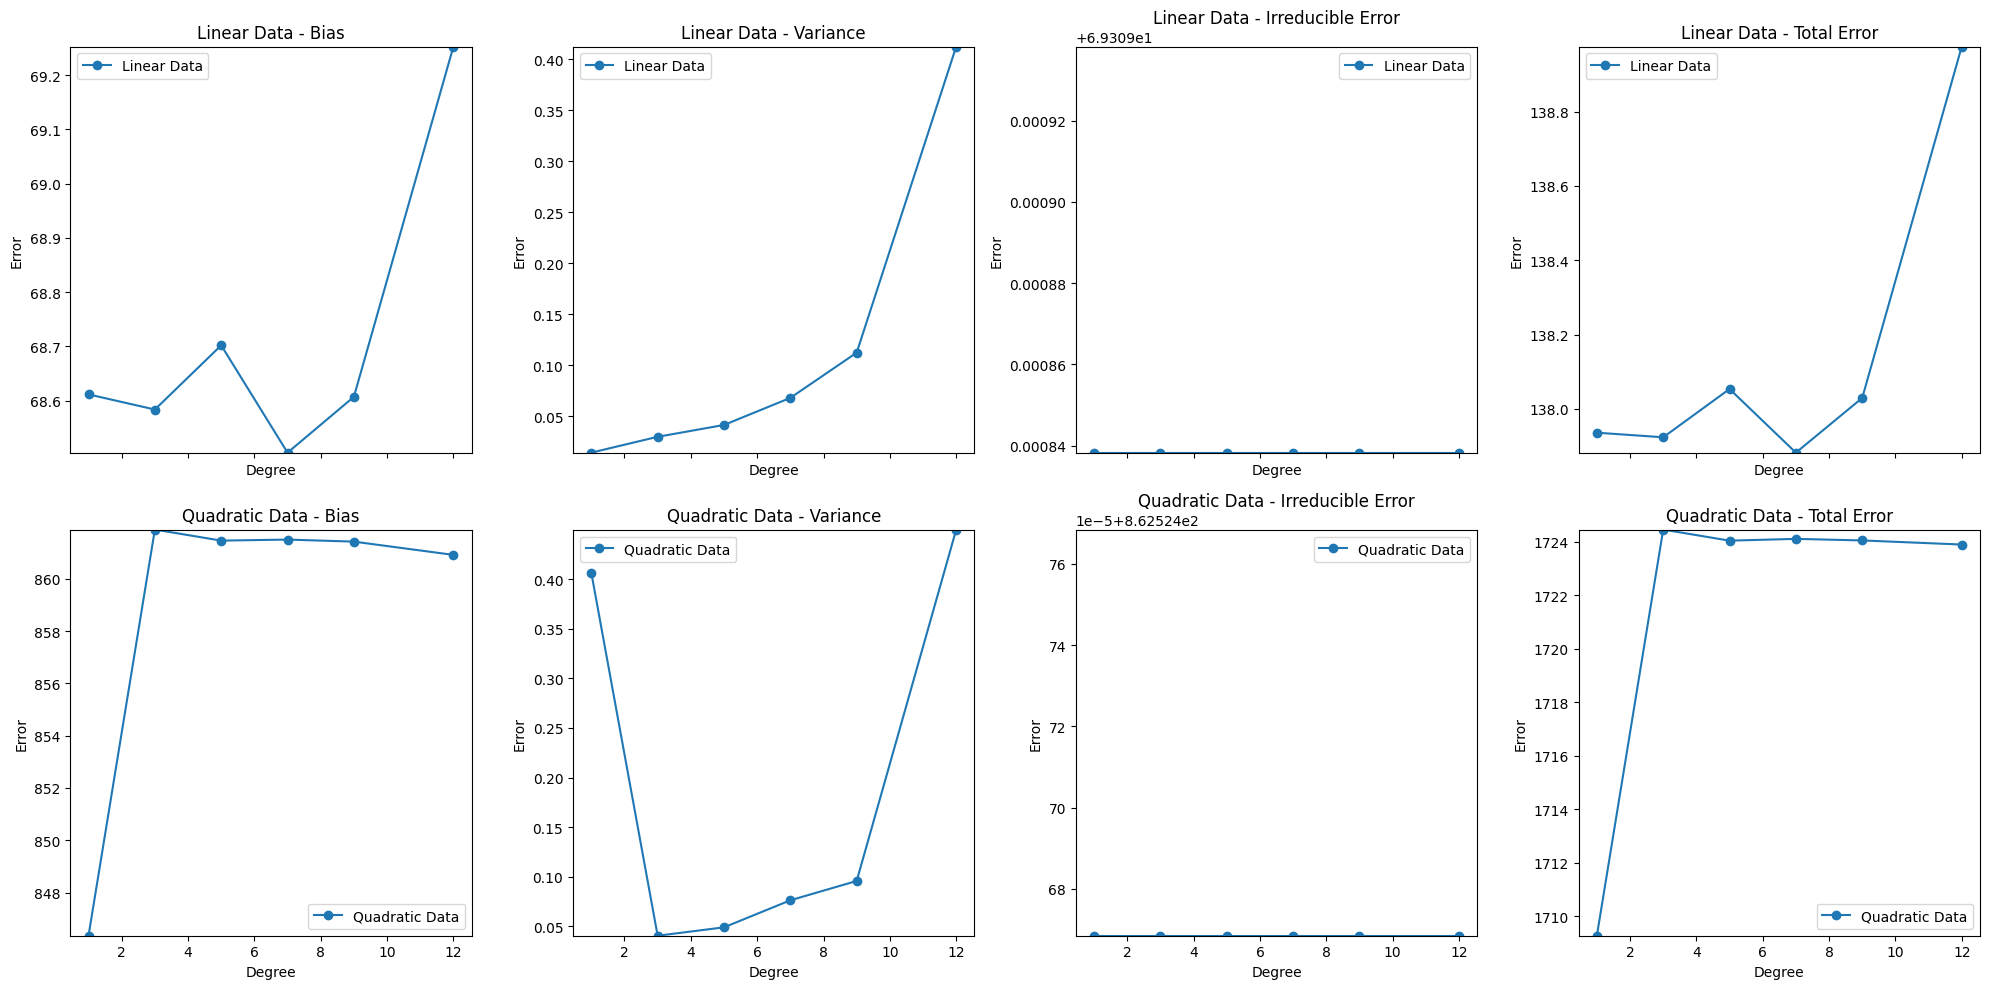

In [31]:
def estimate_errors(degrees, X, Y, Y_true, n_bootstrap=100):
    errors = {degree: {} for degree in degrees}
    
    for degree in degrees:
        predictions = []
        poly = PolynomialFeatures(degree)
        
        for _ in range(n_bootstrap):
            # Bootstrap sampling
            indices = np.random.choice(range(len(X)), size=len(X), replace=True)
            X_bootstrap = X[indices]
            Y_bootstrap = Y[indices]
            
            # Train model
            X_bootstrap_poly = poly.fit_transform(X_bootstrap)
            model = LinearRegression().fit(X_bootstrap_poly, Y_bootstrap)
            
            # Predict on the original test set
            X_test_poly = poly.transform(X)
            Y_pred = model.predict(X_test_poly)
            predictions.append(Y_pred)
        
        predictions = np.array(predictions)
        mean_prediction = np.mean(predictions, axis=0)
        bias = np.mean((mean_prediction - Y_true)**2)
        variance = np.mean(np.var(predictions, axis=0))
        irreducible_error = np.mean((Y - Y_true)**2)
        total_error = bias + variance + irreducible_error
        
        print(f'Degree: {degree}, Bias: {bias}, Variance: {variance}, Irreducible Error: {irreducible_error}, Total Error: {total_error}')
        errors[degree]['bias'] = bias
        errors[degree]['variance'] = variance
        errors[degree]['irreducible_error'] = irreducible_error
        errors[degree]['total_error'] = total_error
    
    return errors

def plot_errors(errors_linear, errors_quadratic, degrees):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=False)
    error_types = ['bias', 'variance', 'irreducible_error', 'total_error']
    titles = ['Bias', 'Variance', 'Irreducible Error', 'Total Error']

    for i, error_type in enumerate(error_types):
        linear_errors = [errors_linear[degree][error_type] for degree in degrees]
        quadratic_errors = [errors_quadratic[degree][error_type] for degree in degrees]
        
        min_l= np.min(linear_errors)
        max_l = np.max(linear_errors)
        min_q = np.min(quadratic_errors)
        max_q = np.max(quadratic_errors)
        
        epsilon = 0.0001
        axes[0, i].set_ylim([min_l, max_l +epsilon])
        axes[1, i].set_ylim([min_q, max_q + epsilon])
        
        axes[0, i].plot(degrees, linear_errors, marker='o', label='Linear Data', scaley=True)
        axes[0, i].set_title(f'Linear Data - {titles[i]}')
        axes[0, i].set_xlabel('Degree')
        axes[0, i].set_ylabel('Error')
        axes[0, i].legend()
        
        axes[1, i].plot(degrees, quadratic_errors, marker='o', label='Quadratic Data')
        axes[1, i].set_title(f'Quadratic Data - {titles[i]}')
        axes[1, i].set_xlabel('Degree')
        axes[1, i].set_ylabel('Error')
        axes[1, i].legend()
        
    plt.tight_layout()
    plt.show()

# Estimate errors for linear and quadratic data sets
errors_linear = estimate_errors(degrees, X_linear, Y_linear, Y_linear_true)
errors_quadratic = estimate_errors(degrees, X_quadratic, Y_quadratic, Y_quadratic_true)

# Plot  errors
plot_errors(errors_linear, errors_quadratic, degrees)

### 1. Is it necessary to train multiple models to estimate the bias, variance, and irreducible error?
Yes, multiple models are needed to estimate bias and variance, as these metrics depend on how the model performs across different datasets. Techniques like bootstrapping or cross-validation are commonly used.

### 2. Is it possible to estimate the model’s bias without access to the true regression function?
No, bias requires knowledge of the true regression function to measure how far the model's average predictions deviate from the true values.

### 3. Is it possible to estimate the model’s variance without access to the true regression function?
Yes, model variance can be estimated by training on different datasets and measuring the variability in predictions, without needing the true regression function.

# Task 4

### 1. How and why do the bias-variance trade-offs differ between the linear and quadratic datasets?
In linear data, higher-degree models reduce bias but increase variance, leading to overfitting. For quadratic data, lower-degree models result in higher bias, while appropriate degrees (like 2) reduce bias and maintain manageable variance.

### 2. Which polynomial degree would you choose for the linear and quadratic datasets to best balance the bias and variance?
For the linear dataset, a degree 1 polynomial balances bias and variance well. For the quadratic dataset, a degree 2 polynomial best captures the relationship without overfitting.

### 3. Overfitting/Underfitting in Polynomial Regression and Bias-Variance Analysis
Overfitting happens with high-degree polynomials, showing low bias but high variance. Underfitting occurs with low-degree polynomials, having high bias and low variance. Bias-variance analysis helps identify these by evaluating errors and prediction consistency across datasets.